In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
%matplotlib inline
import seaborn as sns
from env import user, host, password
from pydataset import data

In [2]:
def get_db_url(user, host, password, db_name):
    return f'mysql+pymysql://{user}:{password}@{host}/{db_name}'

In [3]:
url = get_db_url(user, host, password, 'iris_db')
pd.read_sql('SHOW TABLES', url)

,Tables_in_iris_db
0,measurements
1,species


In [4]:
species = pd.read_sql('SELECT * FROM species', url)
measurements = pd.read_sql('SELECT * FROM measurements', url)

In [5]:
species

,species_id,species_name
0,1,setosa
1,2,versicolor
2,3,virginica


In [6]:
measurements.species_id.unique()

array([1, 2, 3])

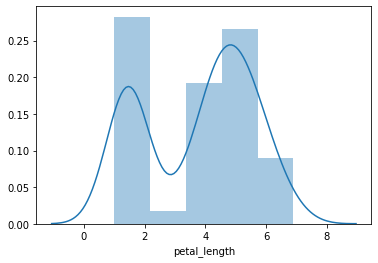

In [7]:
sns.distplot(measurements.petal_length)

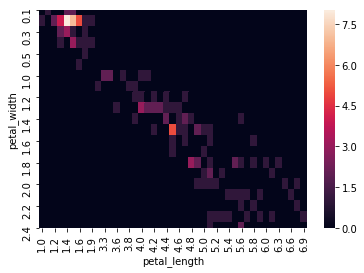

In [8]:
sns.heatmap(pd.crosstab(measurements.petal_width, 
                        measurements.petal_length))


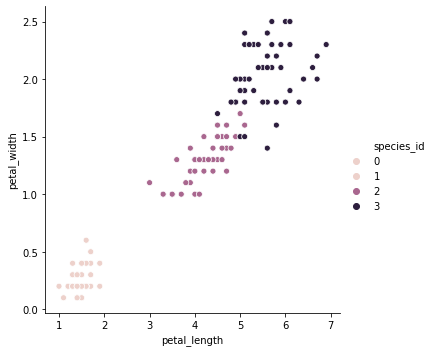

In [9]:
sns.relplot(x='petal_length',
            y='petal_width', hue='species_id',data=measurements)

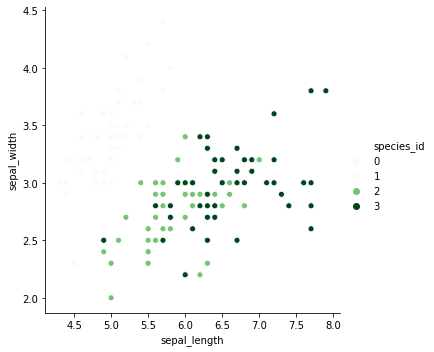

In [10]:
sns.relplot(x='sepal_length',
            y='sepal_width', data=measurements, 
            hue='species_id', palette='Greens'
           )

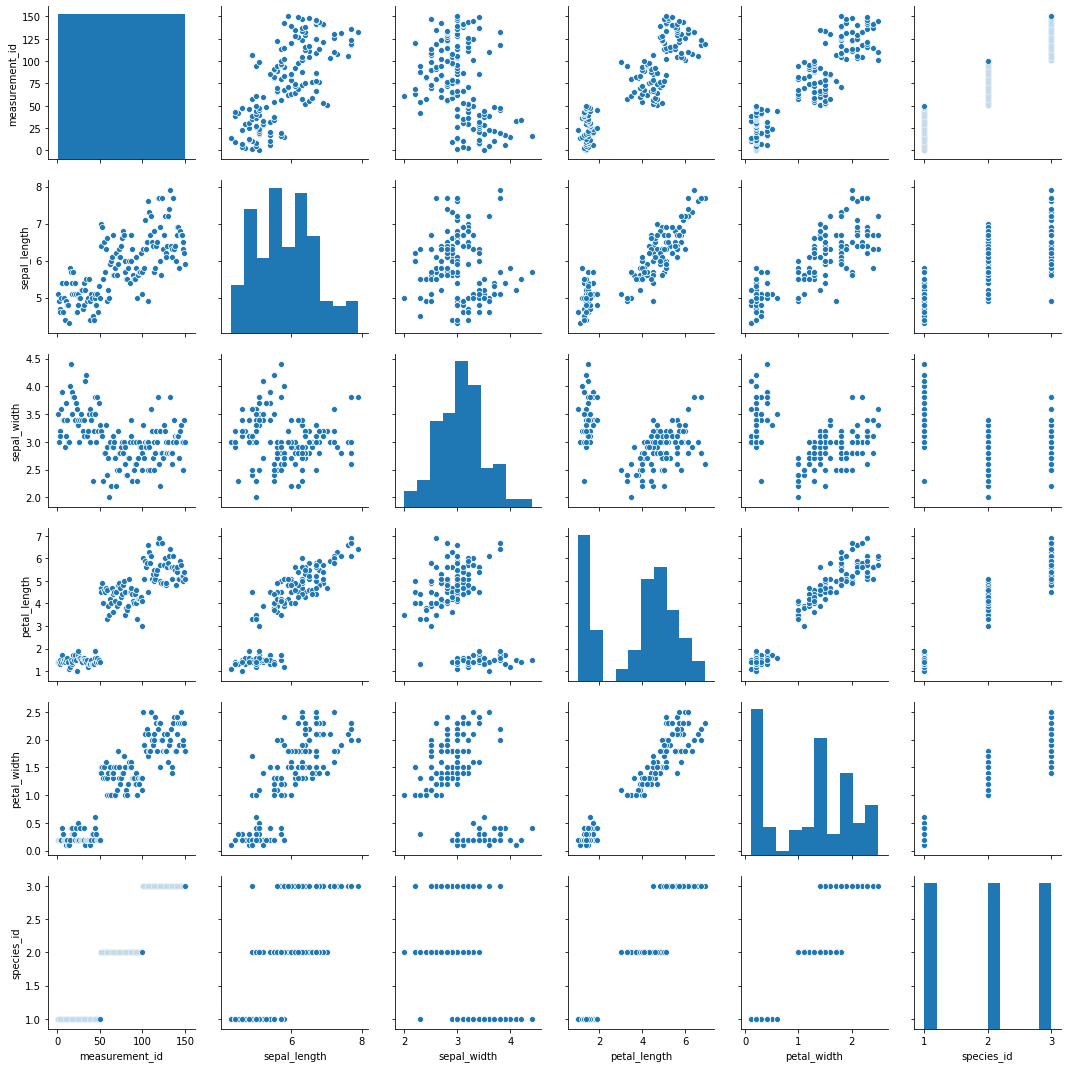

In [11]:
sns.pairplot(measurements)

In [12]:
anscombe = sns.load_dataset('anscombe')

In [13]:
anscombe.groupby(by='dataset').describe()

x                                               y            \
        count mean       std  min  25%  50%   75%   max count      mean   
dataset                                                                   
I        11.0  9.0  3.316625  4.0  6.5  9.0  11.5  14.0  11.0  7.500909   
II       11.0  9.0  3.316625  4.0  6.5  9.0  11.5  14.0  11.0  7.500909   
III      11.0  9.0  3.316625  4.0  6.5  9.0  11.5  14.0  11.0  7.500000   
IV       11.0  9.0  3.316625  8.0  8.0  8.0   8.0  19.0  11.0  7.500909   

                                                   
              std   min    25%   50%   75%    max  
dataset                                            
I        2.031568  4.26  6.315  7.58  8.57  10.84  
II       2.031657  3.10  6.695  8.14  8.95   9.26  
III      2.030424  5.39  6.250  7.11  7.98  12.74  
IV       2.030579  5.25  6.170  7.04  8.19  12.50

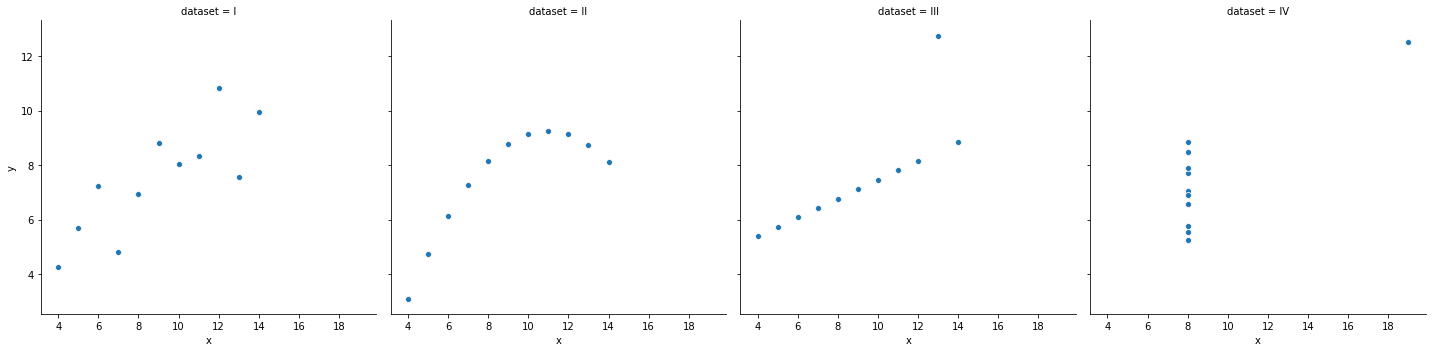

In [14]:
sns.relplot(x='x', y='y', col='dataset', data=anscombe)

In [18]:
insect = data('InsectSprays')#, show_doc=True)

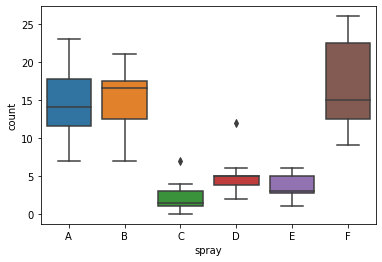

In [20]:
sns.boxplot(data=insect, x='spray', y='count')

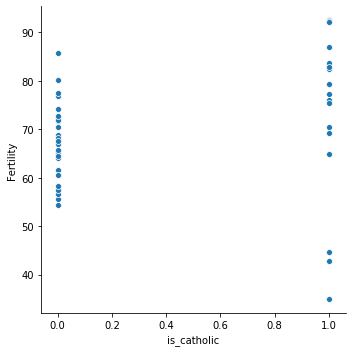

In [31]:
swiss = data('swiss')
swiss['is_catholic'] = swiss.Catholic >= 40
# swiss
sns.relplot(data=swiss, x='is_catholic', y='Fertility')

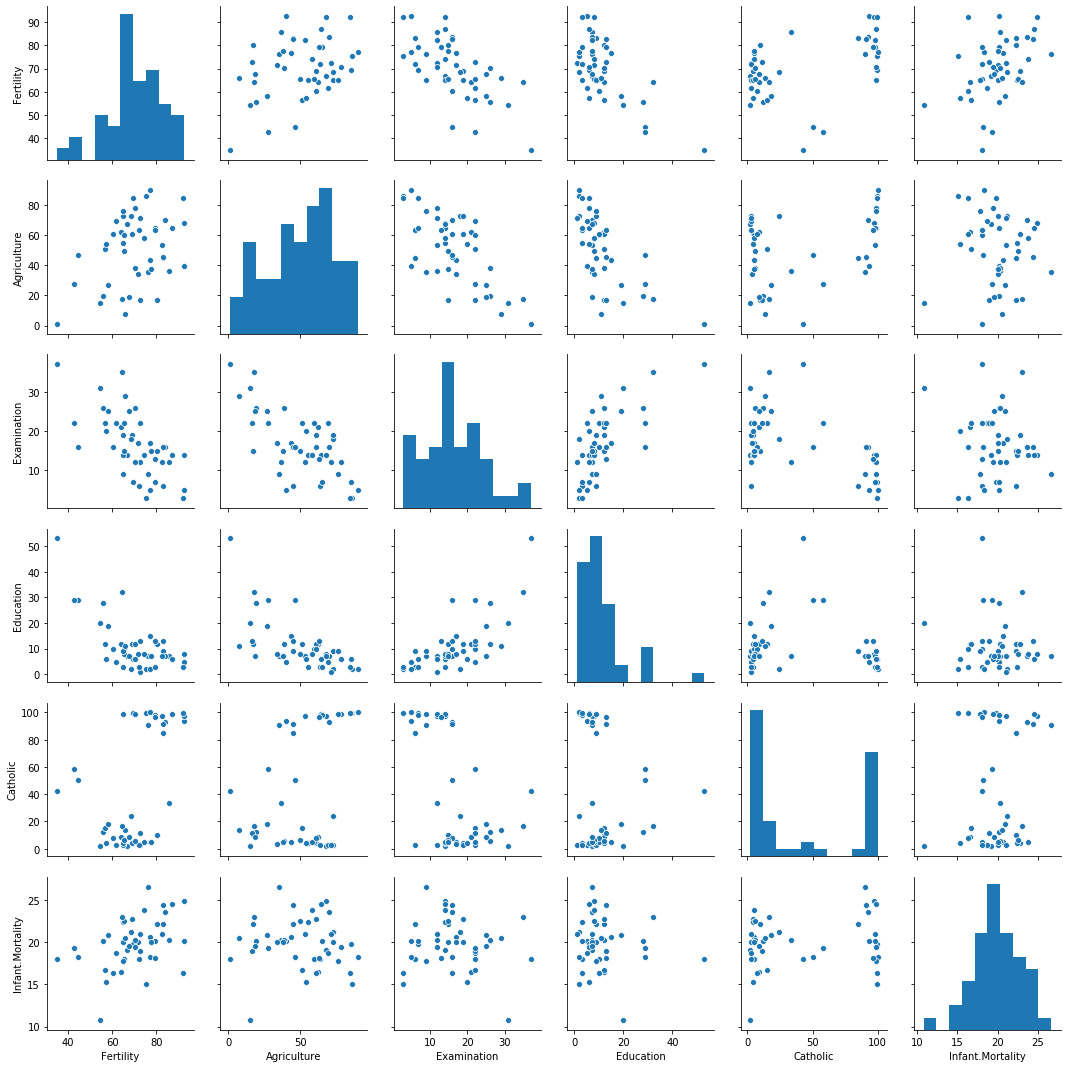

In [37]:
# swiss = swiss.drop(columns='is_catholic')
# swiss
sns.pairplot(swiss)

In [39]:
chipotle = data('chipotle')

Did you mean:
Chile, Chirot, Cowles, hirose, cities, Hitters, shuttle, pottery, Pottery, alcohol, coleman


In [42]:
def get_db_url(u,p,h,d):
    url = f'mysql+pymysql://{u}:{p}@{h}/{d}'
    return url

url = get_db_url(user, password, host, 'chipotle')
chipotle = pd.read_sql('SELECT * FROM orders', url)


In [50]:
top_4 = (chipotle.groupby('item_name').sum()
 .sort_values(by='quantity',ascending=False).head(4))
top_4

,id,order_id,quantity
item_name,,,
Chicken Bowl,1780635,713926,761
Chicken Burrito,1238770,497303,591
Chips and Guacamole,1122252,449959,506
Steak Burrito,818163,328437,386


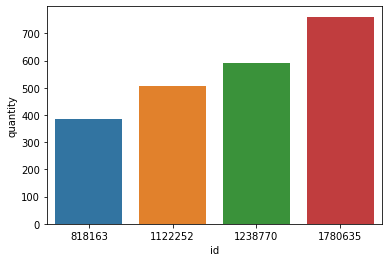

In [57]:
sns.barplot(data=top_4, x='id', y='quantity')
plt.xticks=[x for x in top_4]